#**IMPORTING THE DEPENDENCIES**

In [1]:
# IMPORTING THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

#**LOADING THE DATASET**

In [2]:
# IMPORTING THE DATASET
fraud = pd.read_csv('/content/Fraud_.csv')

#**DATA PRE-PROCESSING**

In [3]:
# GETTING THE INSIGHTS OF THE DATA
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
# HAVING A LOOK THE BOTTOM OF THE DATASET
fraud.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
138106,11,PAYMENT,2859.87,C982676081,175209.00,172349.13,M414629584,0.00,0.00,0.0,0.0
138107,11,PAYMENT,1255.31,C2061341529,59864.00,58608.69,M126670412,0.00,0.00,0.0,0.0
138108,11,CASH_IN,531062.81,C782515510,110491.00,641553.81,C989504089,22382.00,0.00,0.0,0.0
138109,11,CASH_IN,350310.60,C55137804,35814.00,386124.60,C861003200,0.00,0.00,0.0,0.0
138110,11,TRANSFER,436567.82,C353913447,12007.00,0.00,C947982595,58887.10,495454.93,0.0,0.0
138111,11,TRANSFER,1023642.86,C1959247934,144636.00,0.00,C1219349215,5430.52,0.00,0.0,0.0
138112,11,CASH_OUT,110828.64,C2063932957,372369.43,261540.78,C1582808814,462640.85,832488.91,0.0,0.0
138113,11,CASH_OUT,168177.59,C850779719,261540.78,93363.19,C209813603,201463.66,550170.95,0.0,0.0
138114,11,CASH_OUT,345671.65,C1697243396,93363.19,0.00,C224342296,3011784.96,3468735.55,0.0,0.0
138115,11,CASH_OUT,175087.49,C790956975,0.00,0.00,C1748,NaN,NaN,NaN,NaN


In [5]:
# LET'S CHECK THE SHAPE OF OUR DATASET
fraud.shape

(138116, 11)

In [6]:
# GETTING A DETAILED OVERVIEW OF OUR DATASET
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138116 entries, 0 to 138115
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            138116 non-null  int64  
 1   type            138116 non-null  object 
 2   amount          138116 non-null  float64
 3   nameOrig        138116 non-null  object 
 4   oldbalanceOrg   138116 non-null  float64
 5   newbalanceOrig  138116 non-null  float64
 6   nameDest        138116 non-null  object 
 7   oldbalanceDest  138115 non-null  float64
 8   newbalanceDest  138115 non-null  float64
 9   isFraud         138115 non-null  float64
 10  isFlaggedFraud  138115 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 11.6+ MB


In [7]:
# GETTING SOME STATISTICAL MEASURES
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,138116.000000,1.381160e+05,1.381160e+05,1.381160e+05,1.381150e+05,1.381150e+05,138115.000000,138115.0
mean,9.126553,1.784274e+05,8.957970e+05,9.121265e+05,9.069548e+05,1.183330e+06,0.000883,0.0
std,1.868878,3.417495e+05,2.824668e+06,2.861606e+06,2.386388e+06,2.726211e+06,0.029708,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.088971e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,6.007116e+04,2.003750e+04,0.000000e+00,3.084900e+04,8.544306e+04,0.000000,0.0
75%,10.000000,2.210857e+05,1.963066e+05,2.247515e+05,6.666913e+05,1.114277e+06,0.000000,0.0
max,11.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.490552e+07,3.894623e+07,1.000000,0.0


In [8]:
# LETS FIND THE MISSING VALUES IN OUR DATASET
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

##**HANDLING MISSING VALUES**

In [9]:
# SINCE THE MISSING VALUES ARE FEW AS COMPARE TO OUR DATASET,
# LET'S DROP THEM
fraud.dropna(inplace=True)

In [10]:
# RECHECKING THE MISSING VALUES
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
# CHECKING THE UNIQUE VALUES IN "type" COLUMN
fraud['type'].unique()


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
# "nameOrig" column values
fraud['nameOrig'].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C2063932957',
       'C850779719', 'C1697243396'], dtype=object)

In [13]:
# "nameDest" column values
fraud['nameDest'].unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'M414629584',
       'M126670412', 'C989504089'], dtype=object)

#**LABEL ENCODING**

In [14]:
# ENCODING THE VALUES OF "TYPE" COLUMN TO CONVERT CATEGORICAL VALUES INTO NUMERICAL FEATURES
fraud.replace({"type":{'PAYMENT':0,'TRANSFER':1, 'CASH_OUT':2, 'DEBIT':3, 'CASH_IN':4}},inplace=True)

In [15]:
# distribution of the two classes
fraud['isFlaggedFraud'].value_counts()

0.0    138115
Name: isFlaggedFraud, dtype: int64

In [16]:
# distribution of the two classes
fraud['isFraud'].value_counts()

0.0    137993
1.0       122
Name: isFraud, dtype: int64

0 -------> Legit Transactions

1 -------> Fraudulent Transactions

#**DATA VISUALIZATION**

#**PLOTTONG A PAIR PLOT**

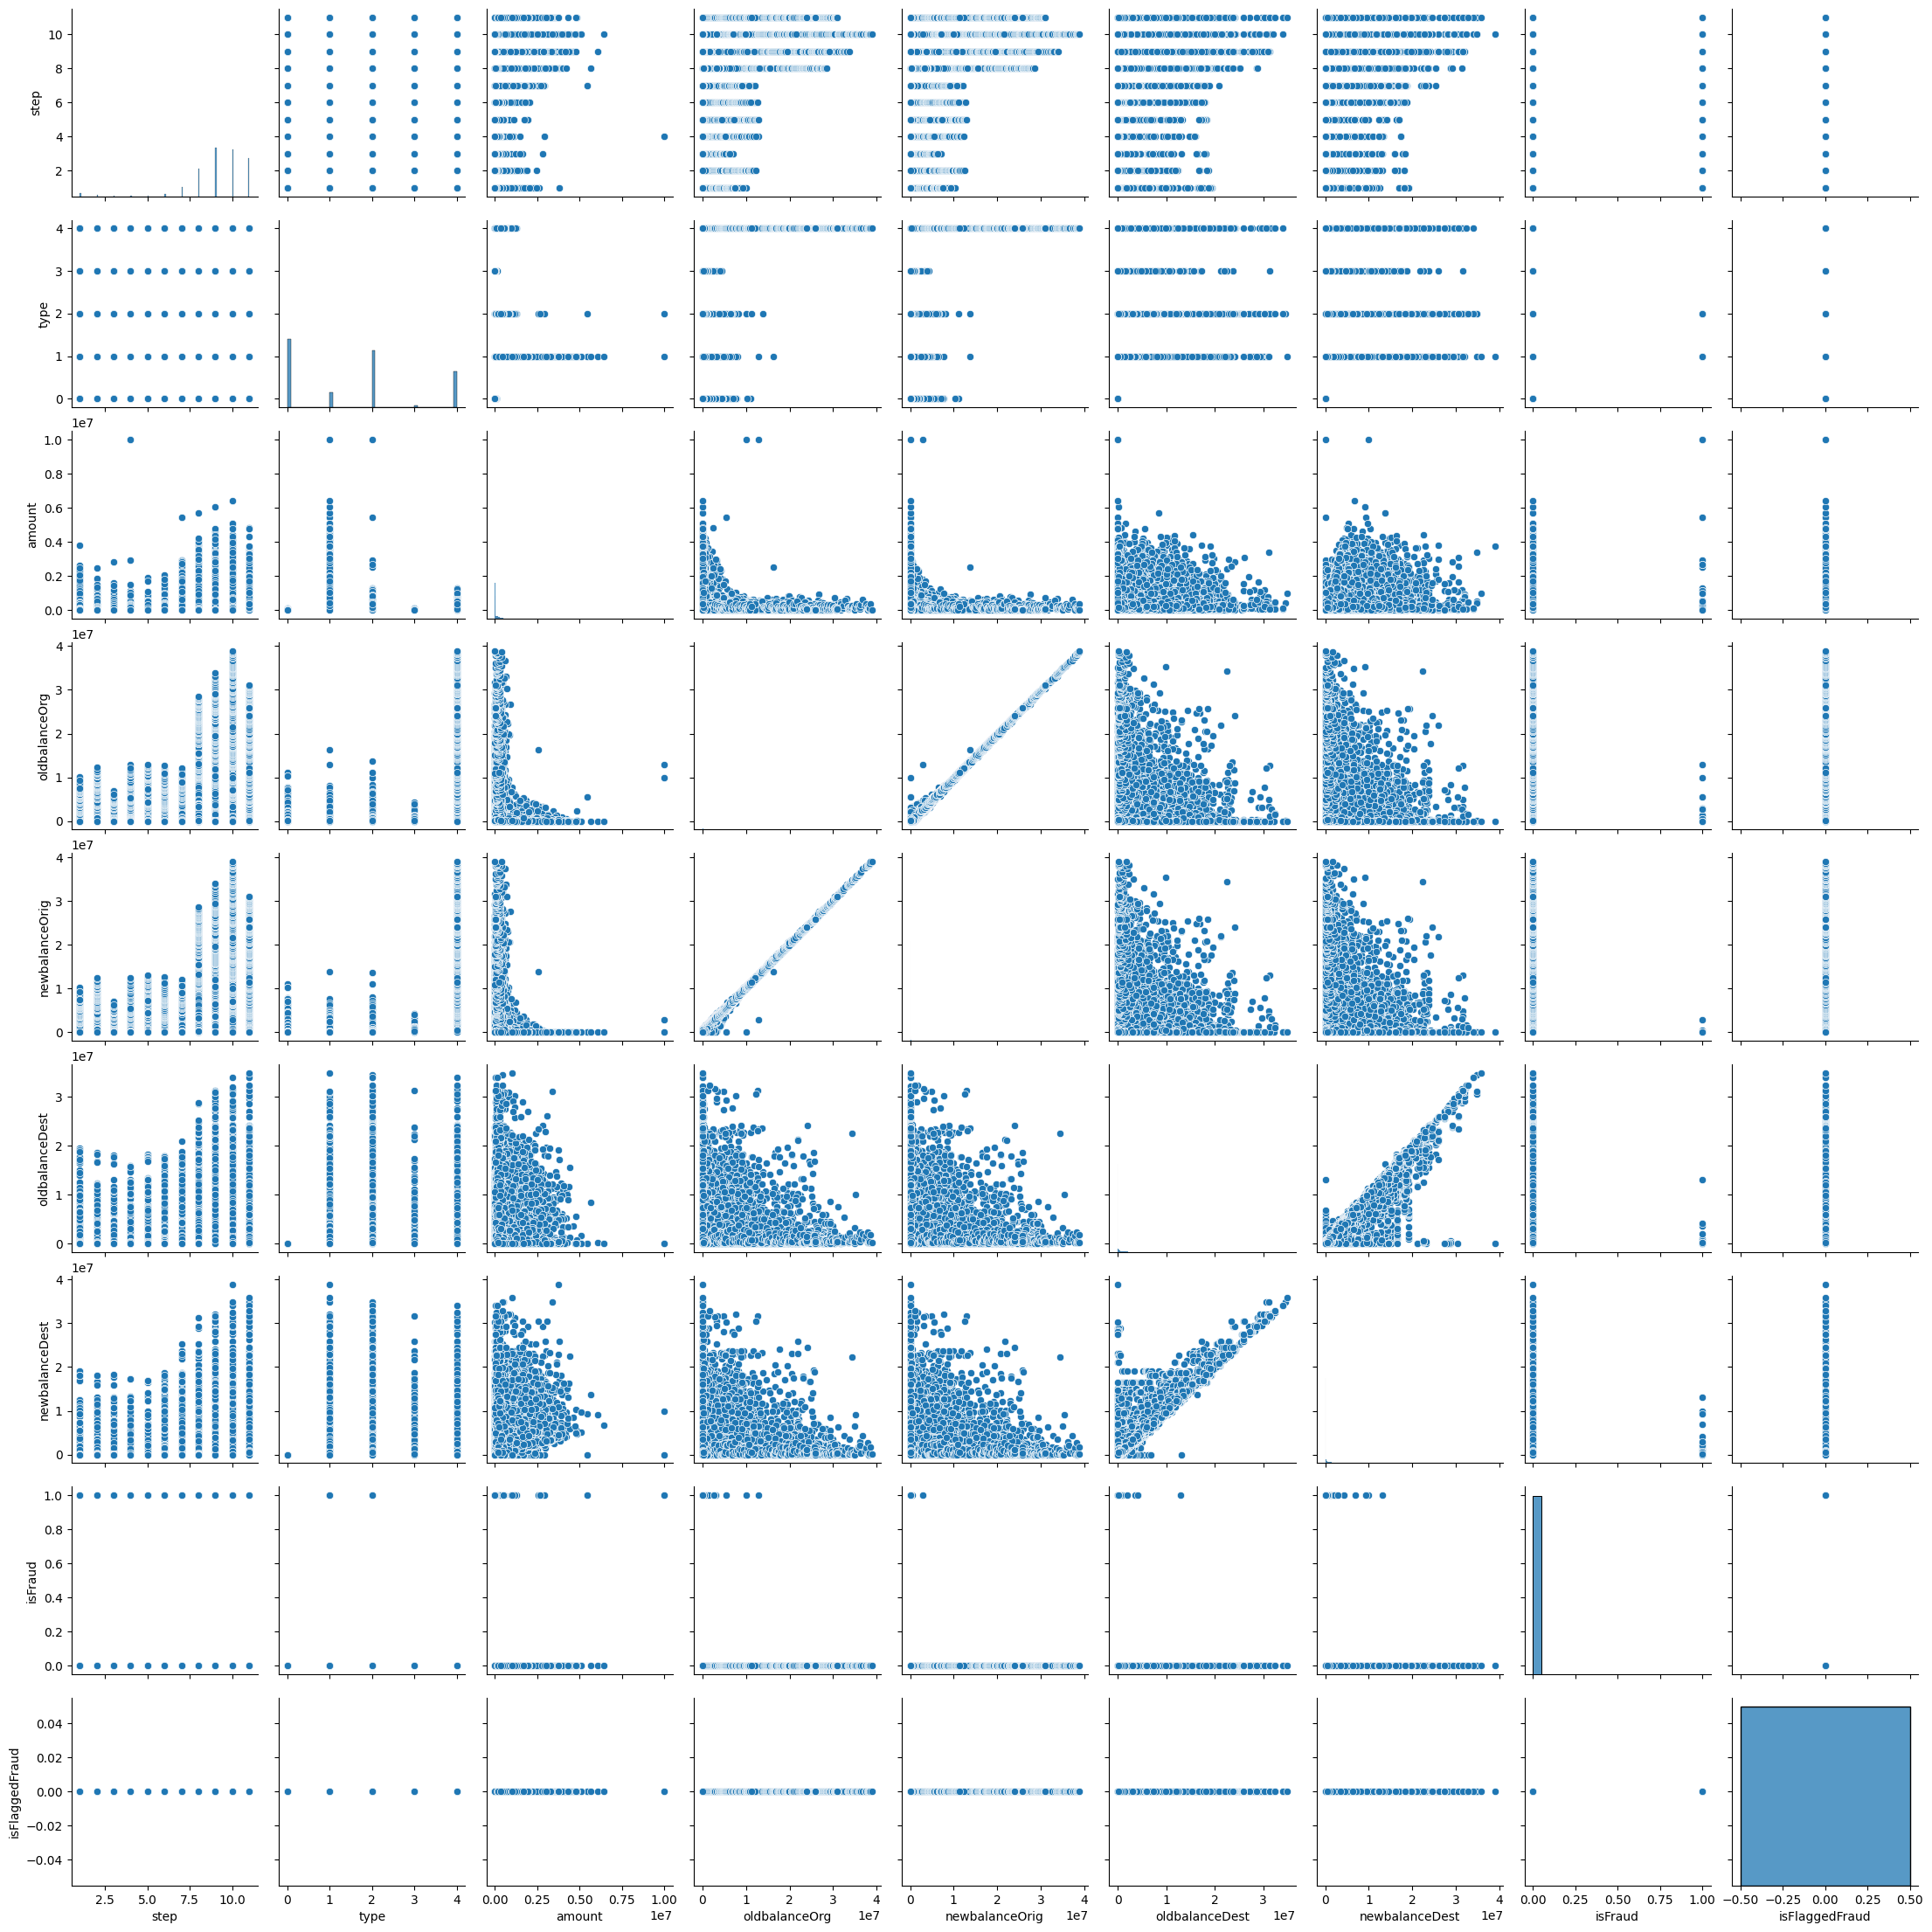

In [17]:
# LETS LOOK AT THE PAIRWISE RELATIONSHIP BETWEEN DIFFERENT VARIABLE OF OUR DATASET
sns.pairplot(fraud)

#**VISUALIZING OUTLIERS**

#**BOX PLOT**

<Axes: >

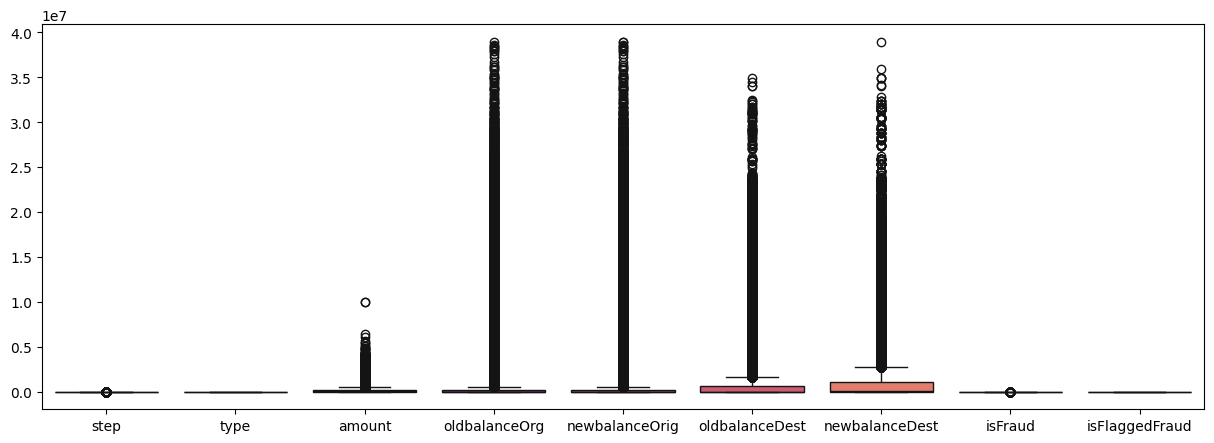

In [18]:
# PLOTTING A BOX PLOT, TO HAVE A LOOK AT OUTLIERS
plt.figure(figsize=(15,5))
sns.boxplot(data=fraud, palette='magma')

#**CORRELATION**

In [19]:
# CHECKING FOR CORRELATIONS
print(fraud.corr())

                    step      type    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.071334  0.065728       0.000058        0.000022   
type            0.071334  1.000000  0.130360       0.432149        0.447466   
amount          0.065728  0.130360  1.000000      -0.016798       -0.022207   
oldbalanceOrg   0.000058  0.432149 -0.016798       1.000000        0.998972   
newbalanceOrig  0.000022  0.447466 -0.022207       0.998972        1.000000   
oldbalanceDest  0.016829  0.224449  0.234142       0.097134        0.098629   
newbalanceDest  0.007568  0.208497  0.361064       0.066367        0.065312   
isFraud        -0.050135 -0.001115  0.033093      -0.003436       -0.009190   
isFlaggedFraud       NaN       NaN       NaN            NaN             NaN   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.016829        0.007568 -0.050135             NaN  
type                  0.224449        0.208497 -0.001115   

<ipython-input-19-3a52370673b9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(fraud.corr())


#**HEATMAP**

<ipython-input-20-21807cba5344>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = fraud.corr(method='pearson')


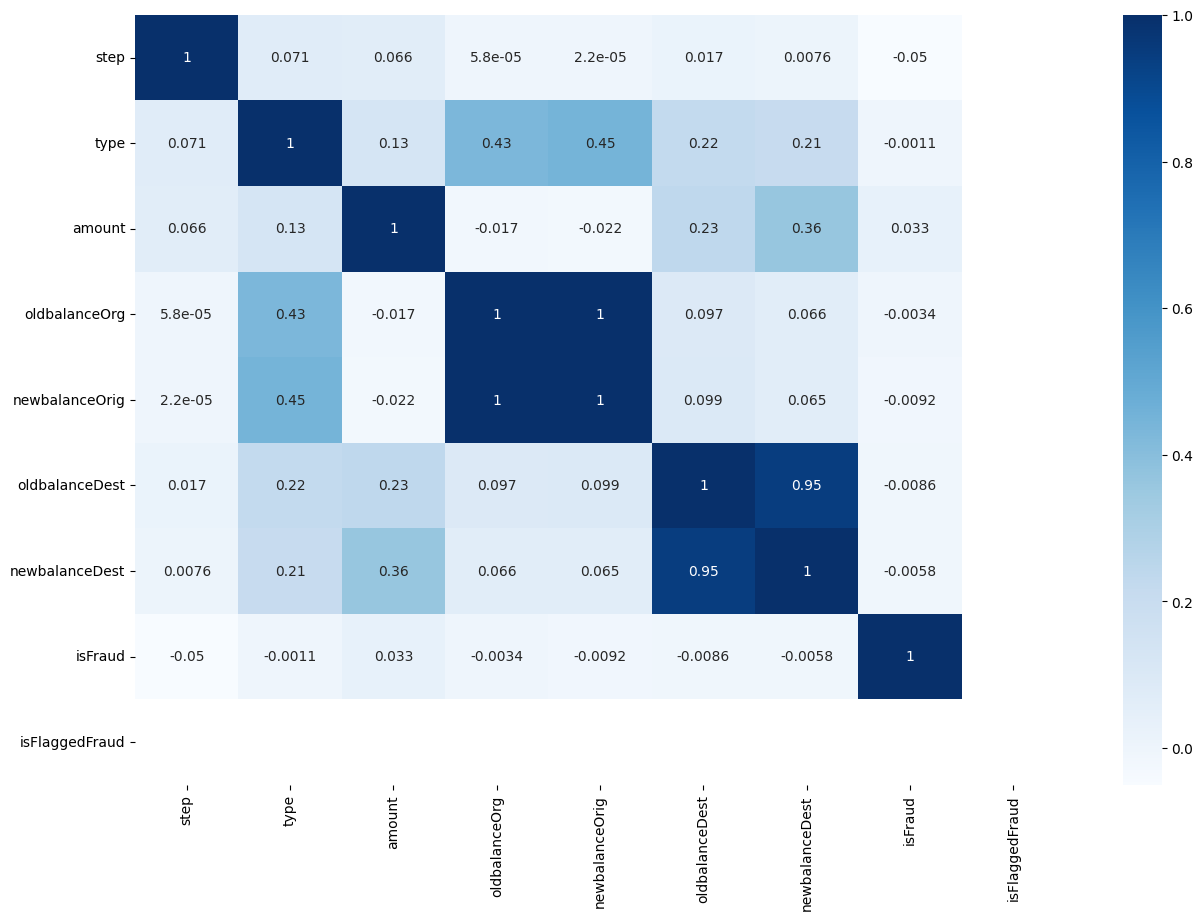

In [20]:
# VISUALIZING THE HEATMAP TO GET AN IDEA ABOUT THE CORRELATION AMONG FEATURES
correlations = fraud.corr(method='pearson')
plt.figure(figsize = (15,10))
sns.heatmap(correlations,cmap="Blues", annot=True)
plt.show()

#**CAT PLOT**

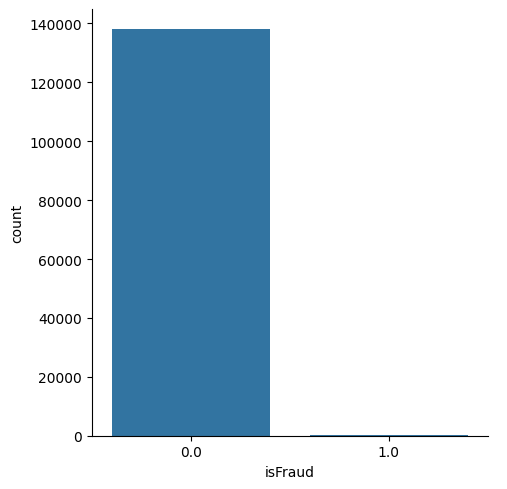

In [21]:
sns.catplot(x='isFraud', data = fraud, kind = 'count')

##**Separating the Target Variable**

In [32]:
columns_to_drop = ['isFraud', 'nameOrig', 'nameDest']

# Dropping multiple columns from the DataFrame
X = fraud.drop(columns=columns_to_drop, axis=1)

# Saving the Target Varible to new DataFrame
Y = fraud['isFraud']

#**DATA STANDARDIZATION**

In [33]:
#This Method Computes the Mean and Standard Deviation of each feature in 'X' and then
# Performs Standardization by Centering and Scaling the features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-4.34836773, -1.04380953, -0.4933081 , ..., -0.38005479,
        -0.43405828,  0.        ],
       [-4.34836773, -1.04380953, -0.51664496, ..., -0.38005479,
        -0.43405828,  0.        ],
       [-4.34836773, -0.37658554, -0.52157044, ..., -0.38005479,
        -0.43405828,  0.        ],
       ...,
       [ 1.00245563,  0.29063845, -0.19780214, ..., -0.1861875 ,
        -0.12869239,  0.        ],
       [ 1.00245563,  0.29063845, -0.02999221, ..., -0.29563247,
        -0.23224966,  0.        ],
       [ 1.00245563,  0.29063845,  0.48937676, ...,  0.88201832,
         0.83831124,  0.        ]])

In [34]:
standardized_data = X
X = standardized_data
Y = fraud['isFraud']


In [35]:
print(X)
print(Y)

        step  type      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0          1     0     9839.64      170136.00       160296.36            0.00   
1          1     0     1864.28       21249.00        19384.72            0.00   
2          1     1      181.00         181.00            0.00            0.00   
3          1     2      181.00         181.00            0.00        21182.00   
4          1     0    11668.14       41554.00        29885.86            0.00   
...      ...   ...         ...            ...             ...             ...   
138110    11     1   436567.82       12007.00            0.00        58887.10   
138111    11     1  1023642.86      144636.00            0.00         5430.52   
138112    11     2   110828.64      372369.43       261540.78       462640.85   
138113    11     2   168177.59      261540.78        93363.19       201463.66   
138114    11     2   345671.65       93363.19            0.00      3011784.96   

        newbalanceDest  isF

In [36]:
# Splitting the Dataset into Training and Testing Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#**MODEL BUILDING**

#**DECISION TREE**

In [38]:
# Taining the Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model_1 = DecisionTreeClassifier()
model_1.fit(X_train, Y_train)

DecisionTreeClassifier()

In [39]:
# Finding the Accuracy score of Training Data
X_train_prediction = model_1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [40]:
# Finding the Accuracy Score of Testing Data
X_test_prediction = model_1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [41]:
# Printing the Confusion Matrix, Classification Report, and Accuray Score
print('Matrix', confusion_matrix(Y_test, X_test_prediction))
print('f1', classification_report(Y_test, X_test_prediction))
print('Accuracy', accuracy_score(Y_test, X_test_prediction))

Matrix [[27597     8]
 [   10     8]]
f1               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27605
         1.0       0.50      0.44      0.47        18

    accuracy                           1.00     27623
   macro avg       0.75      0.72      0.74     27623
weighted avg       1.00      1.00      1.00     27623

Accuracy 0.999348369112696


In [42]:
# Printing the Accuracy of Training Data and Test Data.
print('Accuracy on Training Data : ', training_data_accuracy)
print('Accuracy on Test Data : ', test_data_accuracy)

Accuracy on Training Data :  1.0
Accuracy on Test Data :  0.999348369112696


#**ARTIFICIAL NEURAL NETWORK**

In [43]:
# Training the Model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
model_2 = MLPClassifier()
model_2.fit(X_train, Y_train)

MLPClassifier()

In [44]:
# Finding the Accuracy score of Training Data
X_train_prediction = model_1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [45]:
# Finding the Accuracy Score of Testing Data

X_test_prediction = model_1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [46]:
# Printing the Confusion Matrix, Classification Report, and Accuray Score
print('Matrix', confusion_matrix(Y_test, X_test_prediction))
print('f1', classification_report(Y_test, X_test_prediction))
print('Accuracy', accuracy_score(Y_test, X_test_prediction))

Matrix [[27597     8]
 [   10     8]]
f1               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27605
         1.0       0.50      0.44      0.47        18

    accuracy                           1.00     27623
   macro avg       0.75      0.72      0.74     27623
weighted avg       1.00      1.00      1.00     27623

Accuracy 0.999348369112696


In [47]:
# Printing the Accuracy of Training Data and Test Data.
print('Accuracy on Training Data : ', training_data_accuracy)
print('Accuracy on Test Data : ' , accuracy_score(Y_test, X_test_prediction))

Accuracy on Training Data :  1.0
Accuracy on Test Data :  0.999348369112696


#**RANDOM FOREST CLASSIFIER**

In [48]:
# Training the Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model_3 = DecisionTreeClassifier()
model_3.fit(X_train, Y_train)

DecisionTreeClassifier()

In [49]:
# Finding the Accuracy score of Training Data
X_train_prediction = model_1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [50]:
# Finding the Accuracy Score of Testing Data
X_test_prediction = model_1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [51]:
# Printing the Confusion Matrix, Classification Report, and Accuray Score
print('Matrix', confusion_matrix(Y_test, X_test_prediction))
print('f1', classification_report(Y_test, X_test_prediction))
print('Accuracy', accuracy_score(Y_test, X_test_prediction))

Matrix [[27597     8]
 [   10     8]]
f1               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27605
         1.0       0.50      0.44      0.47        18

    accuracy                           1.00     27623
   macro avg       0.75      0.72      0.74     27623
weighted avg       1.00      1.00      1.00     27623

Accuracy 0.999348369112696


In [52]:
# Printing the Accuracy of Training Data and Test Data.
print('Accuracy on Training Data : ', training_data_accuracy)
print('Accuracy on Test Data : ' , accuracy_score(Y_test, X_test_prediction))

Accuracy on Training Data :  1.0
Accuracy on Test Data :  0.999348369112696


#**XGBOOST CLASSIFIER**

In [53]:
# Training the Model
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgb = xgb.XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
# Finding the Accuracy score of Training Data
X_train_prediction = model_1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [55]:
# Finding the Accuracy Score of Testing Data
X_test_prediction = model_1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [56]:
# Printing the Confusion Matrix, Classification Report, and Accuray Score
print('Matrix', confusion_matrix(Y_test, X_test_prediction))
print('f1', classification_report(Y_test, X_test_prediction))
print('Accuracy', accuracy_score(Y_test, X_test_prediction))

Matrix [[27597     8]
 [   10     8]]
f1               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27605
         1.0       0.50      0.44      0.47        18

    accuracy                           1.00     27623
   macro avg       0.75      0.72      0.74     27623
weighted avg       1.00      1.00      1.00     27623

Accuracy 0.999348369112696


In [57]:
# Printing the Accuracy of Training Data and Test Data.
print('Accuracy on Training Data : ', training_data_accuracy)
print('Accuracy on Test Data : ' , accuracy_score(Y_test, X_test_prediction))

Accuracy on Training Data :  1.0
Accuracy on Test Data :  0.999348369112696


#**BUILDING A PREDICTIVE MODEL**

##**Here, Our System has correctly predicted that the transaction is fraud.**

In [58]:
input_data = (1,1,181.0,181.0,0.0,0.0,0.0,0)

# Changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)


# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = xgb.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print("Transaction is Fraud")
else:
    print("Transaction is Legit")


[[-4.34836773 -0.37658554 -0.52157044 -0.31707191 -0.31874879 -0.38005479
  -0.43405828  0.        ]]
[0]
Transaction is Fraud


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
